## This example contains the model with the leaver (TF-element)

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re

sys.path.append("../run/")
import BondGraph as bg
import networkx as nx


Example 3: 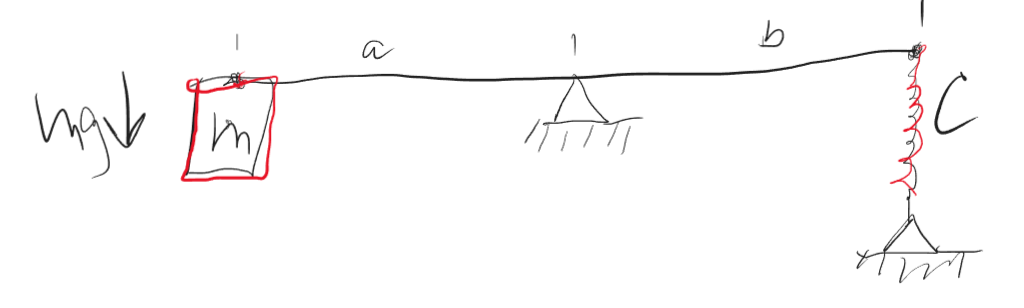

In [2]:
# Create empty model
model = bg.BondGraph(Name ='My Bond graph model with TF')

In [3]:
#Create some elements
TF_1 = bg.BGelement('TF')

SE_1 = bg.BGelement('SE')
C_1 = bg.BGelement('C')
#R_1 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I')
OneJ_1 = bg.BGelement('1')
OneJ_2 = bg.BGelement('1')
OneJ_3 = bg.BGelement('1')
OneJ_4 = bg.BGelement('1')
ZeroJ_1 = bg.BGelement('0')
SF_1 = bg.BGelement('SF')

# print(C)

In [4]:
TF_1.icon


'TF'

In [5]:
# Add the created elements to the model
model.addElement(OneJ_1)
model.addElement(OneJ_2)
model.addElement(OneJ_3)
model.addElement(OneJ_4)
model.addElement(ZeroJ_1)
model.addElement(C_1)
# model.addElement(R_1)

model.addElement(I_1)
model.addElement(SE_1)
model.addElement(SF_1)

model.addElement(TF_1)
# print(model)

In [6]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(TF_1, OneJ_1)
model.connect(TF_1, OneJ_2)
model.connect(OneJ_2, ZeroJ_1)
model.connect(ZeroJ_1, OneJ_3)
model.connect(ZeroJ_1, OneJ_4)
model.connect(C_1, OneJ_3)
# model.connect(R_1, OneJ_2)
model.connect(OneJ_4, SF_1)

In [7]:
model.applyRules()

NB! None val
NB! None val
NB! None val
NB! None val
NB! None val


WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...


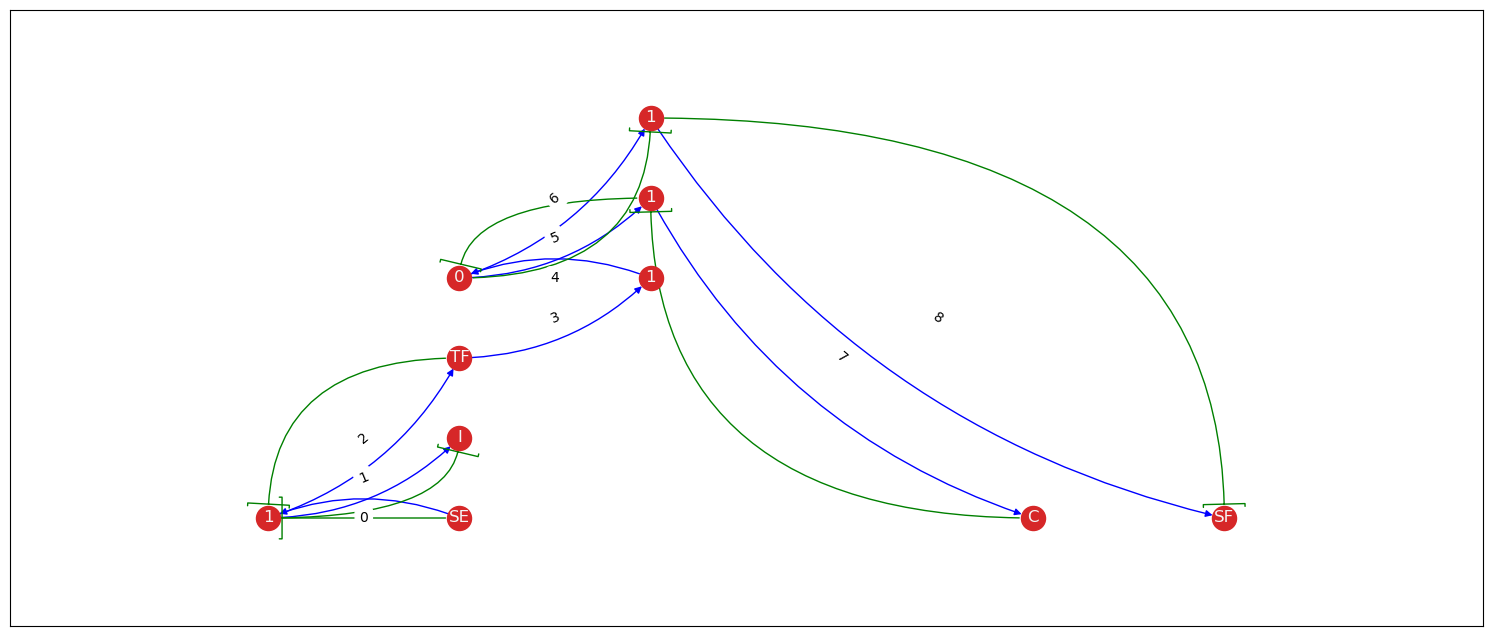

In [8]:
# Set positions automatically for drawing
# some automatically done works on model
model.render()
model.draw()

WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...


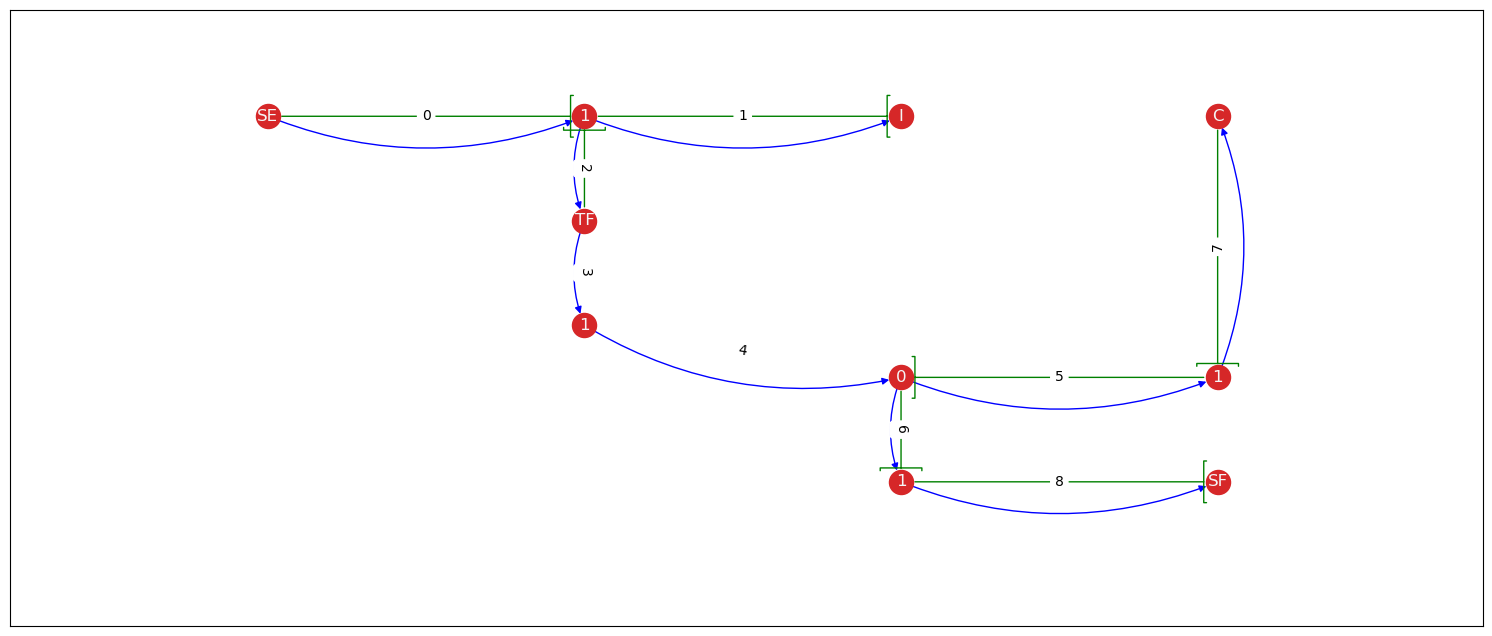

In [9]:
# set positions manually
SE_1.setPosition([1,7])
OneJ_1.setPosition([2,7])
I_1.setPosition([3,7])

TF_1.setPosition([2,5])

OneJ_2.setPosition([2,3])
OneJ_3.setPosition([4,2])
ZeroJ_1.setPosition([3,2])

C_1.setPosition([4,7])
# R_1.setPosition([4,2])
SF_1.setPosition([4,0])
OneJ_4.setPosition([3,0])

# draw
model.draw()

In [10]:
model.verifyRules()

In [11]:
bg.show_ports_state(model)

Element name:  1_4
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 5 |  arrow:  Output |  causality:  Causal
Element name:  1_5
++ port_id: 7 |  arrow:  Input |  causality:  None
++ port_id: 8 |  arrow:  Output |  causality:  None
Element name:  1_6
++ port_id: 11 |  arrow:  Input |  causality:  Uncausal
++ port_id: 15 |  arrow:  Output |  causality:  Causal
Element name:  1_7
++ port_id: 13 |  arrow:  Input |  causality:  Causal
++ port_id: 16 |  arrow:  Output |  causality:  Uncausal
Element name:  0_8
++ port_id: 9 |  arrow:  Input |  causality:  Uncausal
++ port_id: 10 |  arrow:  Output |  causality:  Causal
++ port_id: 12 |  arrow:  Output |  causality:  Uncausal
Element name:  C_2
++ port_id: 14 |  arrow:  Input |  causality:  Uncausal
Element name:  I_3
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  SE_1
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  SF_9
++ port

## assign_equations SEQ


In [12]:
model.assign_equations()
equastions = model.get_model_equations()


assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 1 4 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 4 3 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 4 0 , type:  1 TF -----------------------
from 1 to TF detected Output Input
Fr 1 to TF Bond = 2 el1 eff= +e0-e1-e2 el1 flow= +f0=+f1=+f2 EL2 eff= None el2 flow= None
TFs flow prepared:  +f2*1/n0
-++TF effort=  flow= +f0=+f1=+f2
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 5 , type:  TF 1 -----------------------
from TF to 1 detected Output Input
Fr TF to 1 conn... Bond iD= 3 elem1 eff= None el1 flow= +f2*1/n0 elem2 eff= +e3-e4 elem2 fl= +f3=+f4
TF prepare effort +e3*n0
-+-TF effort= +e3=+e4 flow= +f3=+f2*1/n0
BOND ID= 3
.....for elements C, I, R, SE, SF
both elements found...id-s: 5 8 , type:  1 0 -----------------------
.....for e

In [13]:
for i in model.getElementsList():
#     for val in i.getPorts():
#         if val.id > 4 and val.id < 7:
#             print(i.getName(), i.getId(), val)
            
    if i.getId() == 4:
        print('------\n', i.getName() ,*i.getPorts(), '----\n')
    
    if i.getId() == 0:
        print(i.getName() ,*i.getPorts())


------
 1_4 BGport::_____:___________________
          :   id: 1
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Causal
 BGport::_____:___________________
          :   id: 3
          : Name: None
          : Type: None
          :  Direction: Output
          :  Causality: Uncausal
 BGport::_____:___________________
          :   id: 5
          : Name: None
          : Type: None
          :  Direction: Output
          :  Causality: Causal
 ----

TF_0 BGport::_____:___________________
          :   id: 4
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Uncausal
 BGport::_____:___________________
          :   id: 6
          : Name: None
          : Type: None
          :  Direction: Output
          :  Causality: None



In [14]:
bds = model.getBondList()
for i in bds:
    if i.getId() == 2:
        print('BOND ID=', i.getId(), i)
#     print('BOND ID=', i.getId(), '\n', i.getFromPort(), i.getToPort(), end='----------------\n')

BOND ID= 2 BGbond::_____:___________________
       :   id: 2
       : from: BGport::_____:___________________
          :   id: 5
          : Name: None
          : Type: None
          :  Direction: Output
          :  Causality: Causal

       :   to: BGport::_____:___________________
          :   id: 4
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Uncausal

       : Type: PowerBond
       : effort: +e2=+e3*n0
       :   flow: +f0=+f1=+f2



In [15]:
equastions

['+e0=+SE1',
 '+f0=+f1=+f2',
 '+e1=+e0-e2',
 '+f1=+1/I3*p3',
 '+e2=+e3*n0',
 '+f0=+f1=+f2',
 '+e3=+e4',
 '+f3=+f2*1/n0',
 '+e4=+e5=+e6',
 '+f3=+f4',
 '+e5=+e7',
 '+f5=+f4-f6',
 '+e6=+e8',
 '+f6=+f8',
 '+e7=+1/C2*q2',
 '+f5=+f7',
 '+e8=+e6',
 '+f8=+SF9']

## State-space form sequence

In [17]:
cauchy_state_equastions, variables_exp = model.cauchy_form_equastions_sequence()

assign_bonds...
both elements found... 1 4 SE 1 -----------------------
both elements found... 4 3 1 I -----------------------
Express: not found the variable, inverse variable check
both elements found... 4 0 1 TF -----------------------
from 1 to TF detected Output Input
Fr 1 to TF Bond = 2 el1 eff= +e0-e1-e2 el1 flow= +f0=+f1=+f2 EL2 eff= +e3*n0 el2 flow= +f2*1/n0
-++TF effort= +e2=+e3*n0 flow= +f0=+f1=+f2
both elements found... 0 5 TF 1 -----------------------
from TF to 1 detected Output Input
Fr TF to 1 conn... Bond iD= 3 elem1 eff= +e3*n0 el1 flow= +f2*1/n0 elem2 eff= +e3-e4 elem2 fl= +f3=+f4
-+-TF effort= +e3=+e4 flow= +f3=+f2*1/n0
BOND ID= 3
both elements found... 5 8 1 0 -----------------------
both elements found... 8 6 0 1 -----------------------
Express: not found the variable, inverse variable check
both elements found... 8 7 0 1 -----------------------
both elements found... 6 2 1 C -----------------------
both elements found... 7 9 1 SF -----------------------
Express: 

capacitor_variables= {'dq2/dt': f7, 'dp3/dt': e1}
final_vars= [SE1, SF9, q2, p3, C2, I3, n0]
dq2/dt =
variables list = {f7}
substituting... f7 -----b--- f5
exp in progress... f5
substituting... f5 -----b--- f4 - f6
exp in progress... f4 - f6
substituting... f6 -----b--- f8
exp in progress... f4 - f8
substituting... f4 -----b--- f3
exp in progress... f3 - f8
substituting... f3 -----b--- f2/n0
exp in progress... f2/n0 - f8
substituting... f8 -----b--- SF9
exp in progress... -SF9 + f2/n0
substituting... f2 -----b--- f0
exp in progress... -SF9 + f0/n0
substituting... f0 -----b--- f1
exp in progress... -SF9 + f1/n0
substituting... f1 -----b--- p3/I3
exp in progress... -SF9 + p3/(I3*n0)
-SF9 + p3/(I3*n0)
dp3/dt =
variables list = {e1}
substituting... e1 -----b--- e0 - e2
exp in progress... e0 - e2
substituting... e2 -----b--- e3*n0
exp in progress... e0 - e3*n0
substituting... e0 -----b--- SE1
exp in progress... SE1 - e3*n0
substituting... e3 -----b--- e4
exp in progress... SE1 - e4*n0
subst

In [18]:
model.final_variables

[SE1, SF9, q2, p3, C2, I3, n0]

In [19]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print("State variables: ", model.state_variables)

############## STATE EQUASIONS ############
dq2/dt = -SF9 + p3/(I3*n0)
dp3/dt = SE1 - n0*q2/C2
####################################################
State variables:  [q2, p3]


In [20]:
print('effort-flow list:', model.eff_flows_sp, '\nvariables list:', model.final_variables, '\n inputs:', model.input_variables)

effort-flow list: [f1, f3, e8, e3, f8, e2, f5, e4, e0, f7, f0, e1, f2, e7, f6, f4, e6, e5] 
variables list: [SE1, SF9, q2, p3, C2, I3, n0] 
 inputs: [SE1, SF9]


In [21]:
variables_exp

{f1: [p3/I3],
 f3: [f2/n0],
 e8: [e6],
 e3: [e4],
 f8: [SF9],
 e2: [e3*n0],
 f5: [f4 - f6],
 e4: [e5],
 e0: [SE1],
 f7: [f5],
 f0: [f1],
 e1: [e0 - e2],
 f2: [f0],
 e7: [q2/C2],
 f6: [f8],
 f4: [f3],
 e6: [e4],
 e5: [e7]}

## Make state-space eq in matrix from

In [22]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.A} \n Matrix B: {model.B}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
() --------------
(-1, n0, q2, 1/C2) --------------
Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]])
(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
() --------------
(-1, n0, q2, 1/C2) --------------
Matrix([[0, -1], [1, 0]])
Matrix A: Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]]) 
 Matrix B: Matrix([[0, -1], [1, 0]])
 input_variables: [SE1, SF9] 
 state_variables: [q2, p3]


In [23]:
model.A

Matrix([
[     0, 1/(I3*n0)],
[-n0/C2,         0]])

In [24]:
model.B

Matrix([
[0, -1],
[1,  0]])

## Make С-В-matrix
Now we can set the input variables and get С-В-matrix

In [25]:
# Enter for example e7,f7
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp, 'e7,f7')

Input the names of output variables:
It mast be in list eff_flows:  [f1, f3, e8, e3, f8, e2, f5, e4, e0, f7, f0, e1, f2, e7, f6, f4, e6, e5] (Velocity of Force at some point)
U entered this:  ['e7', 'f7']
output variable=  e7
first match [q2/C2]
output variable=  f7
first match [f5]
next iteration with expression: f4 - f6
next iteration with expression: f3 - f8
next iteration with expression: -SF9 + f2/n0
next iteration with expression: -SF9 + f0/n0
next iteration with expression: -SF9 + f1/n0
next iteration with expression: -SF9 + p3/(I3*n0)


In [26]:
cauchy_form_output_eq

{e7: q2/C2, f7: -SF9 + p3/(I3*n0)}

In [27]:
model.make_output_statespace(cauchy_form_output_eq)
print(model.C, model.D)

(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[1/C2, 0], [0, 1/(I3*n0)]])
(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[0, 0], [0, -1]])
Matrix([[1/C2, 0], [0, 1/(I3*n0)]]) Matrix([[0, 0], [0, -1]])


## Make numerical matrixes from symbolic

In [28]:
print('List of system parameters:', model.parameter_variables)
parameters_list = model.parameter_variables

parameters_values = [1/10, 0.1, 2]


List of system parameters: [C2, I3, n0]


In [29]:
# k = 10
# 1/k

In [30]:
model.input_variables

[SE1, SF9]

In [31]:
# initial state
# initial_state = np.random.rand(len(model.state_variables),1)
initial_state = np.zeros((len(model.state_variables),1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps=100
sampling_period=0.5
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 1] = 0

initial_state:  [[0.]
 [0.]]


In [32]:
# set initial state values

initial_state[0] = 0
initial_state[1] = 1

In [33]:
def integrate(output,  initial_state = 0):
    integral = np.zeros(len(output))
    integral[0] = initial_state
    for i in range(1, len(output)):
        integral[i] = integral[i-1] + output[i]
    return integral

In [34]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


In [35]:
output_pos = integrate(output[1,:-1])


print(f'output size: {output[0,:-1].shape} state size: {initial_state.shape}')

output size: (100,) state size: (2, 1)


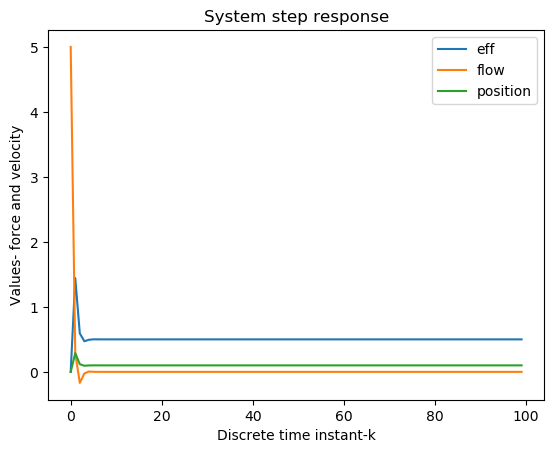

In [36]:
plt.plot(output[0,:-1])
plt.plot(output[1,:-1])

plt.plot(output_pos)

plt.xlabel('Discrete time instant-k')
plt.ylabel('Values- force and velocity')
plt.title('System step response')
plt.legend (('effort', 'flow', 'position(int(flow))'))